<a href="https://colab.research.google.com/github/datgerhardt/simple-mnist-model/blob/main/mnist_in_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pylab inline
import tensorflow as tf
from keras.utils import np_utils
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D

Populating the interactive namespace from numpy and matplotlib


In [5]:
!nvidia-smi

Fri Jul 23 05:25:03 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [8]:
# Data preprocessing
from tensorflow.keras.datasets import mnist 
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = [x/255 for x in [x_train, x_test]]
y_train, y_test = [tf.keras.utils.to_categorical(x) for x in [y_train, y_test]]
num_classes = 10
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (10000, 28, 28)
(60000, 10) (10000, 10)


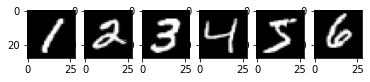

In [3]:
plt.subplot(161)
plt.imshow(x_train[3], cmap=plt.get_cmap('gray'))
plt.subplot(162)
plt.imshow(x_train[5], cmap=plt.get_cmap('gray'))
plt.subplot(163)
plt.imshow(x_train[7], cmap=plt.get_cmap('gray'))
plt.subplot(164)
plt.imshow(x_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(165)
plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(166)
plt.imshow(x_train[13], cmap=plt.get_cmap('gray'))



In [12]:
x_tn = x_train.reshape((60000, 28, 28, 1)).astype('float32')
x_tt = x_test.reshape((10000, 28, 28, 1)).astype('float32')
print(x_tn.shape, x_tt.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [13]:
model = Sequential()
model.add(Conv2D(30, (5,5), input_shape=(28,28,1), activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(15, (3,4), activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(50, activation="relu"))
model.add(Dense(num_classes, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()
model.fit(x_tn, y_train, validation_data=(x_tt, y_test), epochs=30, batch_size=200, verbose=2)


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 9, 15)         5415      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 4, 15)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 5, 4, 15)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 300)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)              

In [15]:
model.save('model.h5')

In [19]:
model.save_weights('weights.h5')

In [16]:
pip install tensorflowjs

     |████████████████████████████████| 64 kB 1.9 MB/s 


In [22]:
!pip list | grep tensorflowjs

tensorflowjs                  3.8.0


In [21]:
! tensorflowjs_converter --input_format keras 'model.h5' 'content/models'

2021-07-23 06:25:17.699148: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [23]:
# https://towardsdatascience.com/deploying-a-simple-machine-learning-model-into-a-webapp-using-tensorflow-js-3609c297fb04